In [1]:
!pip install gradio

     --------------------------------------- 14.2/14.2 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00
     ------------------------------------- 812.8/812.8 kB 25.9 MB/s eta 0:00:00
     ------------------------------------- 202.7/202.7 kB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 101.4/101.4 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 56.9/56.9 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 71.5/71.5 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
     ---------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\gabri\\AppData\\Roaming\\Python\\Python39\\site-packages\\~harset_normalizer\\md.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
# Imports
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import numpy as np
from PIL import Image
import gradio as gr
import sys
sys.path.append("../")

C:\Users\gabri\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gabri\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\gabri\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import putting_it_together as Module

pygame 2.1.2 (SDL 2.0.18, Python 3.9.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Custom audio or custom model?
custom_audio = True
custom_model = True

In [4]:
# Path to the custom audio model
audio_model_path = "../Audio_Generation/Generation_Scripts/saved_models/default"

# Path to the custom audio data
audio_data_path = "../Audio_Generation/Generation_Scripts/data/albedo"

# Path to the custom model to load in
custom_model_path = "../Finetuning/outputs/r/"

In [5]:
# Setup function to setup the environment
Module.setup(custom_audio, custom_model, audio_model_path, audio_data_path, custom_model_path)

Initializing image model...


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Image model initialized!
Initializing custom text model
Custom text model initialized!
Initializing custom audio model
Loaded 1.5.5.mp3
Loading the encoder ../Audio_Generation/Generation_Scripts/saved_models/default\encoder.pt... 
Loaded encoder "../Audio_Generation/Generation_Scripts/saved_models/default\encoder.pt" trained to step 1564501
Done
Loaded 2.5.mp3
Loaded 3.5.mp3
Loaded 4.5.mp3
Loaded 5.5.mp3
Loaded 6.5.mp3
Loaded 7.5.mp3
Loaded 8.5.mp3
Testing custom audio...
Generating the mel spectrogram...
Loading the synthesizer ../Audio_Generation/Generation_Scripts/saved_models/default\synthesizer.pt... 
Synthesizer using device: cuda
Done
Trainable Parameters: 30.870M
Loaded synthesizer "../Audio_Generation/Generation_Scripts/saved_models/default\synthesizer.pt" trained to step 295000

| Generating 1/1


Done.

Loading the vocoder ../Audio_Generation/Generation_Scripts/saved_models/default\vocoder.pt... 
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at ../Audi

Press space to talk to my waifu
Press enter when done speaking
Recording
Finished recording
No audio detected. Try typing instead
Prompt: 

 I love you


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 I love you too
Generating the mel spectrogram...

| Generating 1/1


Done.

 Done! append


  0%|          | 0/50 [00:00<?, ?it/s]

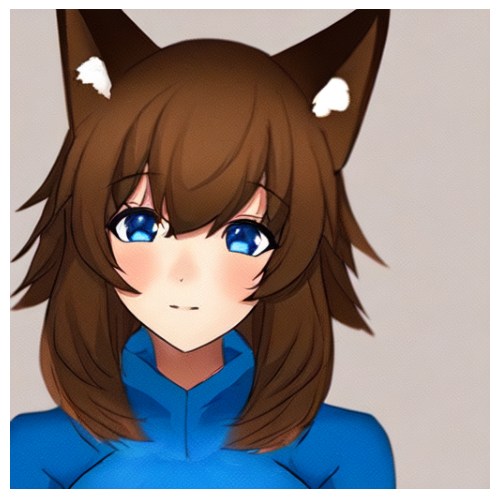

Press space to talk to my waifu


KeyboardInterrupt: 

In [6]:
# Making sure everything is working fine
img_settings = "1girl, very wide shot, simple background, solo focus, female focus, looking at viewer, ratio:16:9, detailed"
img_characteristics = "waifu, female, brown hair, blue eyes, sidelocks, slight blush, fox ears"
Module.main(custom_audio, custom_model, img_settings, img_characteristics)

In [9]:
def build_img_prompt(text):
    # Get the summary and sentiment
    sent = get_sent(text)
    summary = get_summ(text)
    
    # Create the image prompt
    settings = "1girl, very wide shot, simple background, solo focus, female focus, looking at viewer, ratio:16:9, detailed"
    characteristics = "waifu, female, brown hair, blue eyes, sidelocks, slight blush, fox ears"
    # sent = "furious"
    # summary = "'I hope get know better' to viewer"
    prompt = f"{settings} {characteristics} {','+sent if len(sent)!=0 else ''}, {summary}"
    return prompt


def text_to_image(settings, characteristics, text):
    # Get the image prompt
    prompt = Module.build_img_prompt(text, settings, characteristics)
    
    # Get the image
    with Module.suppress_stdout():
        with autocast("cuda"):
            image = Module.pipe(prompt, guidance_scale=10)["images"]
    
    # # Create the image
    # # settings = "1girl, very wide shot, simple background, solo focus, feamle focus, looking at viewer, ratio:16:9, detailed"
    # # characteristics = "waifu, female, brown hair, blue eyes, sidelocks, slight blush, fox ears"
    # # sent = "happy"
    # # summary = "'I hope get know better' to viewer"
    # prompt = f"{settings} {characteristics} {','+sent if len(sent)!=0 else ''}, '{summary}' to viewer"
    # with autocast("cuda"):
    #     image = Module.pipe(prompt, guidance_scale=10)["images"]
    return image

with gr.Blocks() as interface:
    # Text boxes
    settings = gr.Textbox(label="Settings", value= "1girl, very wide shot, simple background, solo focus, female focus, looking at viewer, ratio:16:9, detailed", interactive=True)
    characteristics = gr.Textbox(label="Characteristics", value="waifu, female, brown hair, blue eyes, sidelocks, slight blush, fox ears", interactive=True)
    text = gr.Textbox(label="Text", value="I love you too!", interactive=True)
    
    # Note gallery expects a 4-D array: (N, L, W, 3)
    gallery = gr.Gallery(label="Generated images", show_label=False)
    
    # Button to generate an image
    btn = gr.Button("Generate")
    btn.click(fn=text_to_image, inputs=[settings, characteristics, text], outputs=gallery)

interface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


  0%|          | 0/50 [00:00<?, ?it/s]